# COURSE: Master statistics and machine learning: Intuition, Math, code
##### COURSE URL: udemy.com/course/statsml_x/?couponCode=202304 
## SECTION: Clustering and dimension-reduction
### VIDEO: K-nearest neighbor
#### TEACHER: Mike X Cohen, sincxpress.com

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
from sklearn.neighbors import KNeighborsClassifier

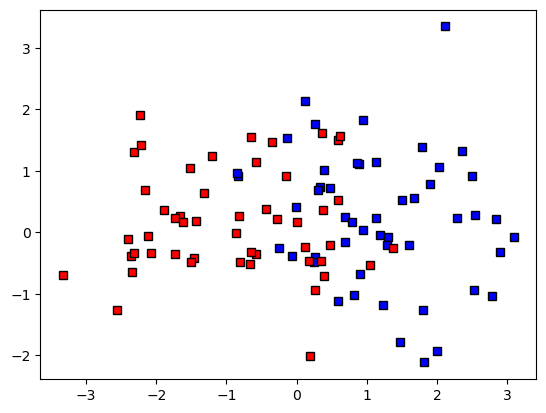

In [5]:
## Create data

# Note: we first manually calculate KNN without using scikit learn:

nPerClust = 50 # data points per cluster

# XY centroid locations for 2 clusters
A = [  1, 0 ]
B = [ -1, 0 ]

# generate data
# 
a = [ A[0]+np.random.randn(nPerClust) , A[1]+np.random.randn(nPerClust) ]
b = [ B[0]+np.random.randn(nPerClust) , B[1]+np.random.randn(nPerClust) ]

# concatanate into a list
data = np.transpose( np.concatenate((a,b),axis=1) )
# init 2 labels for the 2 clusters (0 and 1) - 50 points each
grouplabels = np.concatenate((np.zeros(nPerClust),np.ones(nPerClust)))

# group color assignment
groupcolors = 'br' # blue and red

# show the data
fig,ax = plt.subplots(1)
# take the first/second 50 rando distributed data points using grouplabels==0 or 1 and color them
ax.plot(data[grouplabels==0,0],data[grouplabels==0,1],'ks',markerfacecolor=groupcolors[0]) # blue
# second 50 data points (originally randomly distributed)
ax.plot(data[grouplabels==1,0],data[grouplabels==1,1],'ks',markerfacecolor=groupcolors[1]) # red
plt.show()

# Note how some of the points invade the other's territory

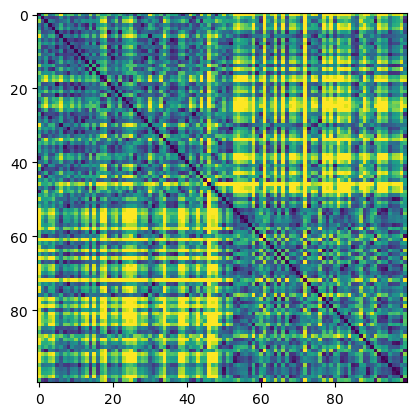

In [6]:
## compute distance matrix

# An all to all distance matrix

# initialize
distmat = np.zeros((nPerClust*2,nPerClust*2))

# loop over elements
for i in range(nPerClust*2):
    for j in range(nPerClust*2):
        # Euclidian distances between all possible pairs of data points
        distmat[i,j] = np.sqrt( (data[i,0]-data[j,0])**2 + (data[i,1]-data[j,1])**2 )

plt.imshow(distmat,vmax=4)
plt.show()

# similar to correlation matrix, but the diagonal is 0s instead of 1s because every data point is 0 units away from itself.
# see video https://www.udemy.com/course/statsml_x/learn/lecture/20246050#content at timestamp 7:20
# the matrix is symmetric because the dist between point a and b is the same as the distance between point b and point a.
# the top left and bottom right blocks are cluster 1 and 2 all close to each other
  # the top right (dist between clust 1 and 2) and bottom left blocks are showing  the distances are farther apart (though not uniformly)

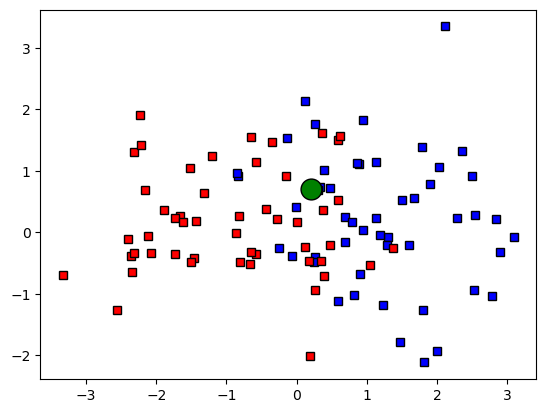

In [8]:
## create the new data point

# random new point
newpoint = 2*np.random.rand(2)-1

# and plot it - the new point is a green marker
ax.plot(newpoint[0],newpoint[1],'ko',markerfacecolor='g',markersize=15)
fig

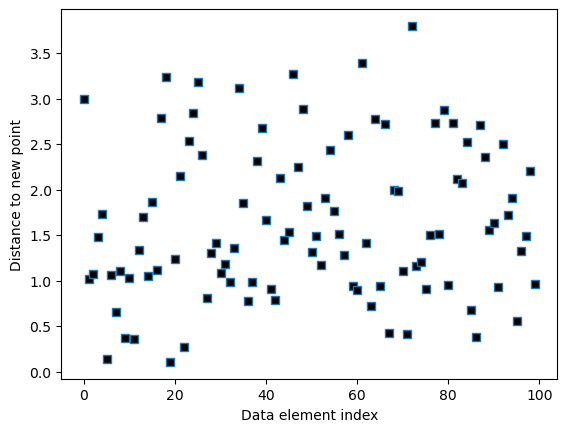

In [11]:
# compute distance vector
distvec = np.zeros(nPerClust*2)

# to determine what group the new green marker point belongs to, we look at distances to all other points
for i in range(nPerClust*2):
    # getting distances from each existing point to the new point (not all points like before)
    distance_in_x = data[i,0]-newpoint[0]
    distance_in_y = data[i,1]-newpoint[1]
    distvec[i] = np.sqrt( (distance_in_x)**2 + (distance_in_y)**2 )
    

# show the distances
plt.plot(distvec,'s',markerfacecolor='k')
plt.xlabel('Data element index') # x axis is the 100 data points
plt.ylabel('Distance to new point') # y axis shows the distance from the data point to the new green marker point
plt.show()

[0. 0. 0.]
New data belong to group 0


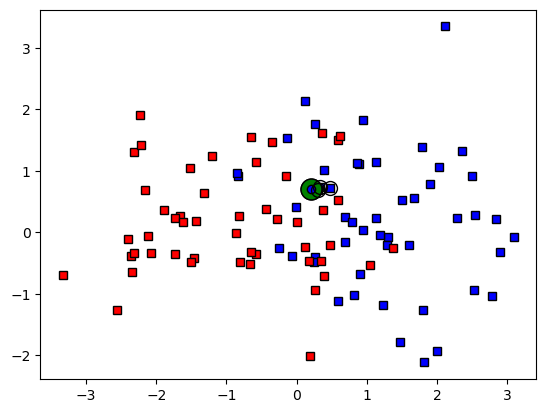

In [14]:
## now for the labeling

# k parameter - the three smallest distances to the new green marker
k = 3

# sort the distances in ascending order
sortidx = np.argsort(distvec) # distvec is the distances computed before - [2.23423,1.02342,...]

# find the group assignment of the nearest neighbors
print(grouplabels[sortidx[:k]])
# note that we use the median instead of the mean
# note:  there's still the awkward situation of having an equal number of datapoints in each group, which is why it's useful to have an odd-numbered k.
whichgroup = int( np.median(grouplabels[sortidx[:k]]) )
print('New data belong to group ' + str(whichgroup))

# and re-plot
ax.plot(newpoint[0],newpoint[1],'ko',markerfacecolor='g',markersize=15)
ax.plot(newpoint[0],newpoint[1],'ko',markerfacecolor=groupcolors[whichgroup])
ax.plot(data[sortidx[:k],0],data[sortidx[:k],1],'ko',markersize=10,fillstyle='none')
fig

In [17]:
## In practice you just use this function:

# use euclidian distance, k = 3 from above
knn = KNeighborsClassifier(n_neighbors=k, metric='euclidean')
knn.fit(data,grouplabels) # grouplabels = np.concatenate((np.zeros(nPerClust),np.ones(nPerClust)))
print(newpoint)
print(newpoint.reshape(1,-1)) # turns it into a 2d arr
# use the predict method to input the newpoint to predict which group they belong to
whichgroupP = knn.predict(newpoint.reshape(1,-1)) # need to reshape to fit the argument expectation for .predict()

print('New data belong to group ' + str(whichgroupP[0]))
# this will agree with the above results we computed manually.

[0.20224054 0.69720811]
[[0.20224054 0.69720811]]
New data belong to group 0.0
